# 可视化的操作

## 1. run listener

### cmd命令提示符，找到当前pycharm的目录，加入监听

### 输入 d: ==>dir查找当前下的目录==>cd 输入目录 ==>继续，直到找到当前运行pycharm的目录

### 在当前目录下输入，tensorboard  --logdir logs，设置监听

### 输出本地的地址localhost6006，用浏览器打开，就是可视化界面.

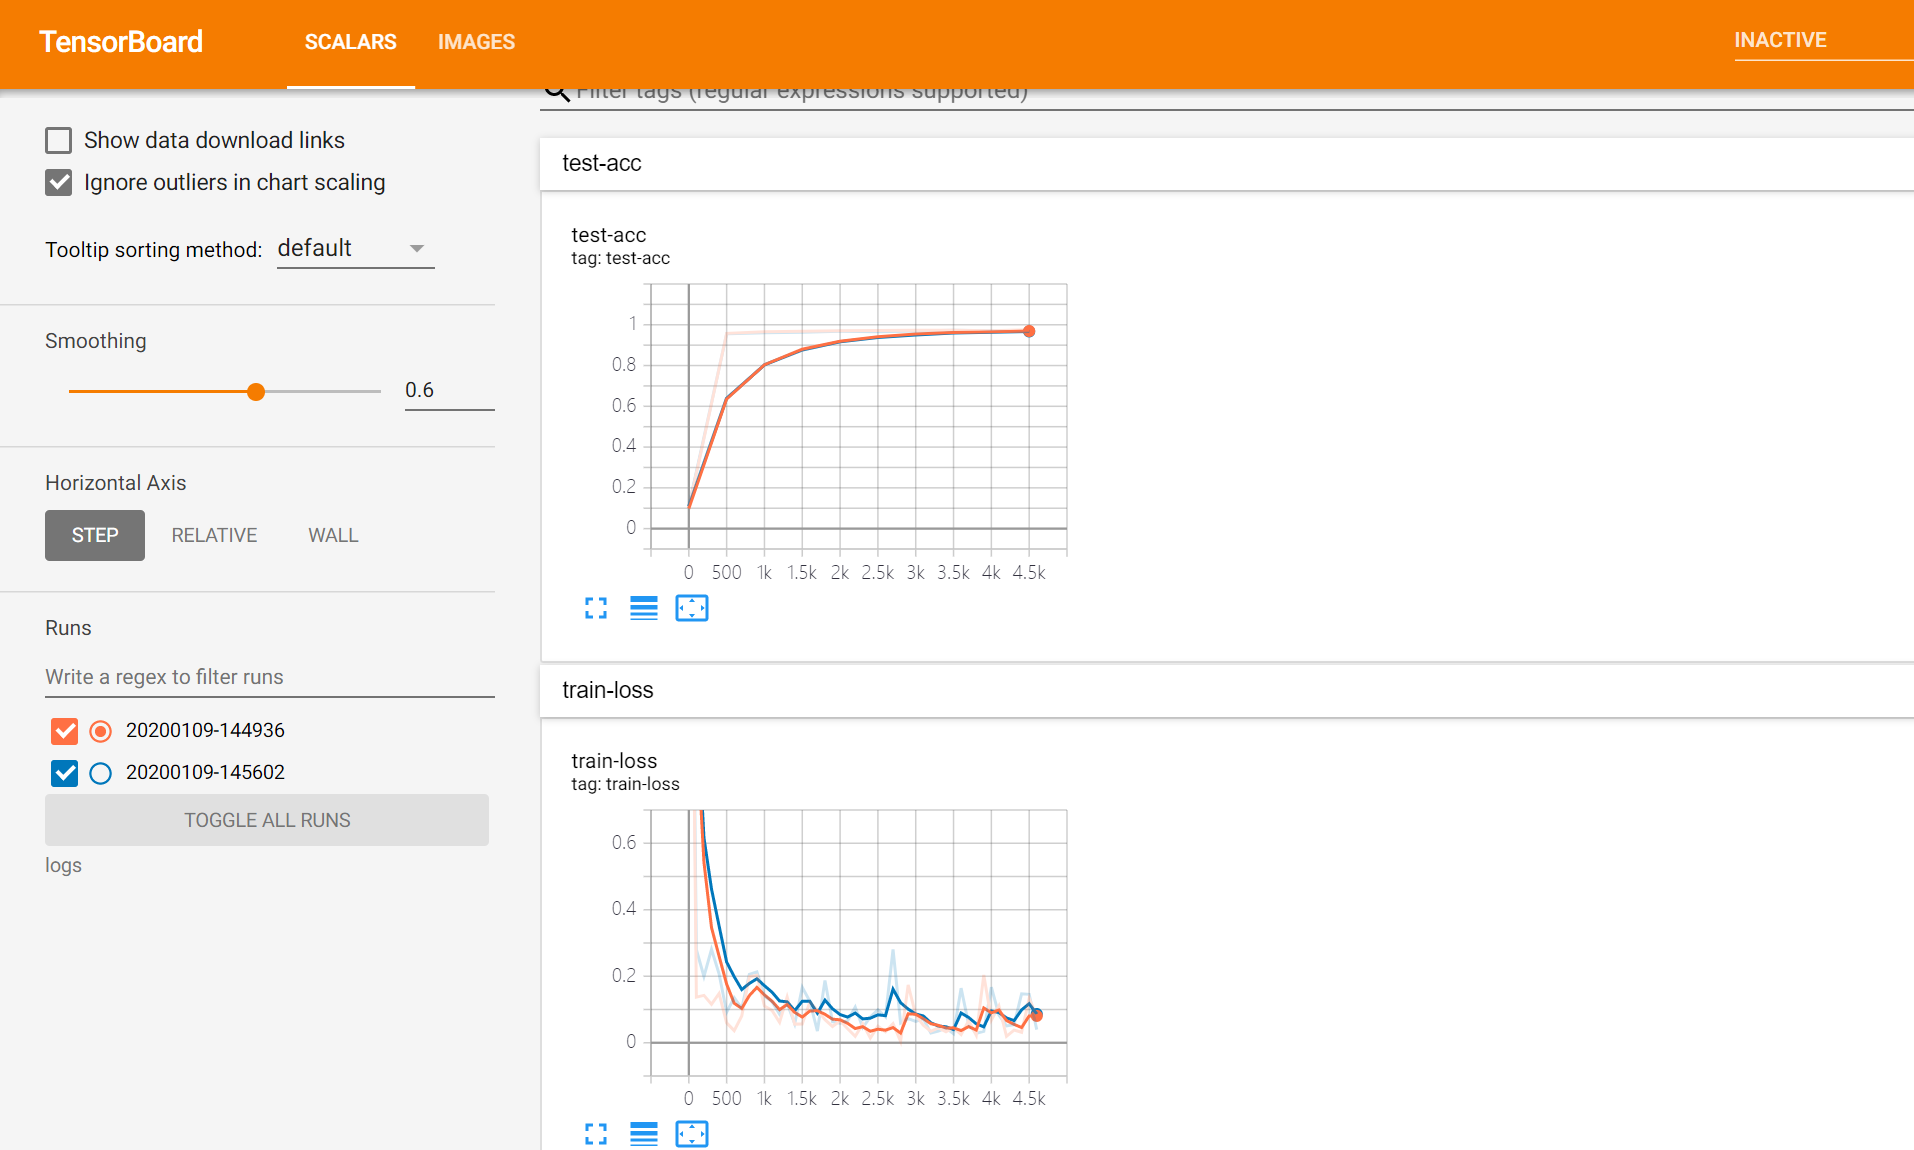

## 2.build summary

In [2]:
import tensorflow as tf

In [ ]:
summary_writer = tf.summary.create_file_writer(log_dir) 
# 新建summary，相当于是创建一个记录变化的日志
# 通过这句话给tensorboard传我们需要监听的路径，summary可以将监听到的数据写入web，显示之后就是可视化

## 3.喂数据，即写入操作

###  （1）fed scalar

In [ ]:
with summary_writer.as_default():
    tf.summary.scalar('loss',float(loss),step=epoch)
    tf.summary.scalar('accuracy',float(train_accuracy),step=epoch)

## 每隔100个数据，将loss喂进去显示

In [ ]:
    if step % 100 == 0:

        print(step, 'loss:', float(loss))
        with summary_writer.as_default(): 
            tf.summary.scalar('train-loss', float(loss), step=step) 

## (2)fed  single image

In [ ]:
with summary_writer.as_default():
    tf.summary.image("Training sample:", sample_img, step=0)

## (3)fed multiple image

In [ ]:
with summary_writer.as_default():
            tf.summary.image("val-onebyone-images:", val_images, max_outputs=25, step=step)

### 默认每一张分开显示，需要我们人为的先把多张图拼接成一张图之后显示

In [ ]:
 val_images = tf.reshape(val_images, [-1, 28, 28])
            figure  = image_grid(val_images)
            tf.summary.image('val-images:', plot_to_image(figure), step=step)